In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
car = pd.read_csv('car data.csv')

In [3]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car.shape

(301, 9)

In [5]:
sns.set_style('dark')

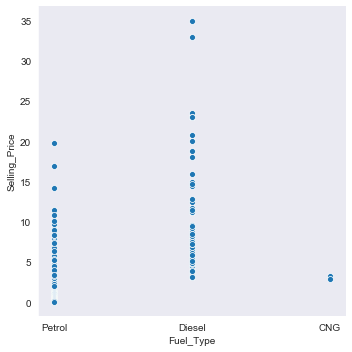

In [6]:
sns.relplot(data = car, y = 'Selling_Price', x ='Fuel_Type')

In [7]:
car.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
new = car[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [12]:
new.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
new['Current_year'] = 2020

In [14]:
new.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [15]:
new['Car_Age'] = new['Current_year'] - new['Year']

In [16]:
new.drop(['Year', 'Current_year'], axis =1, inplace = True)

In [17]:
new = pd.get_dummies(new, drop_first = True)

In [18]:
new.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [19]:
new.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


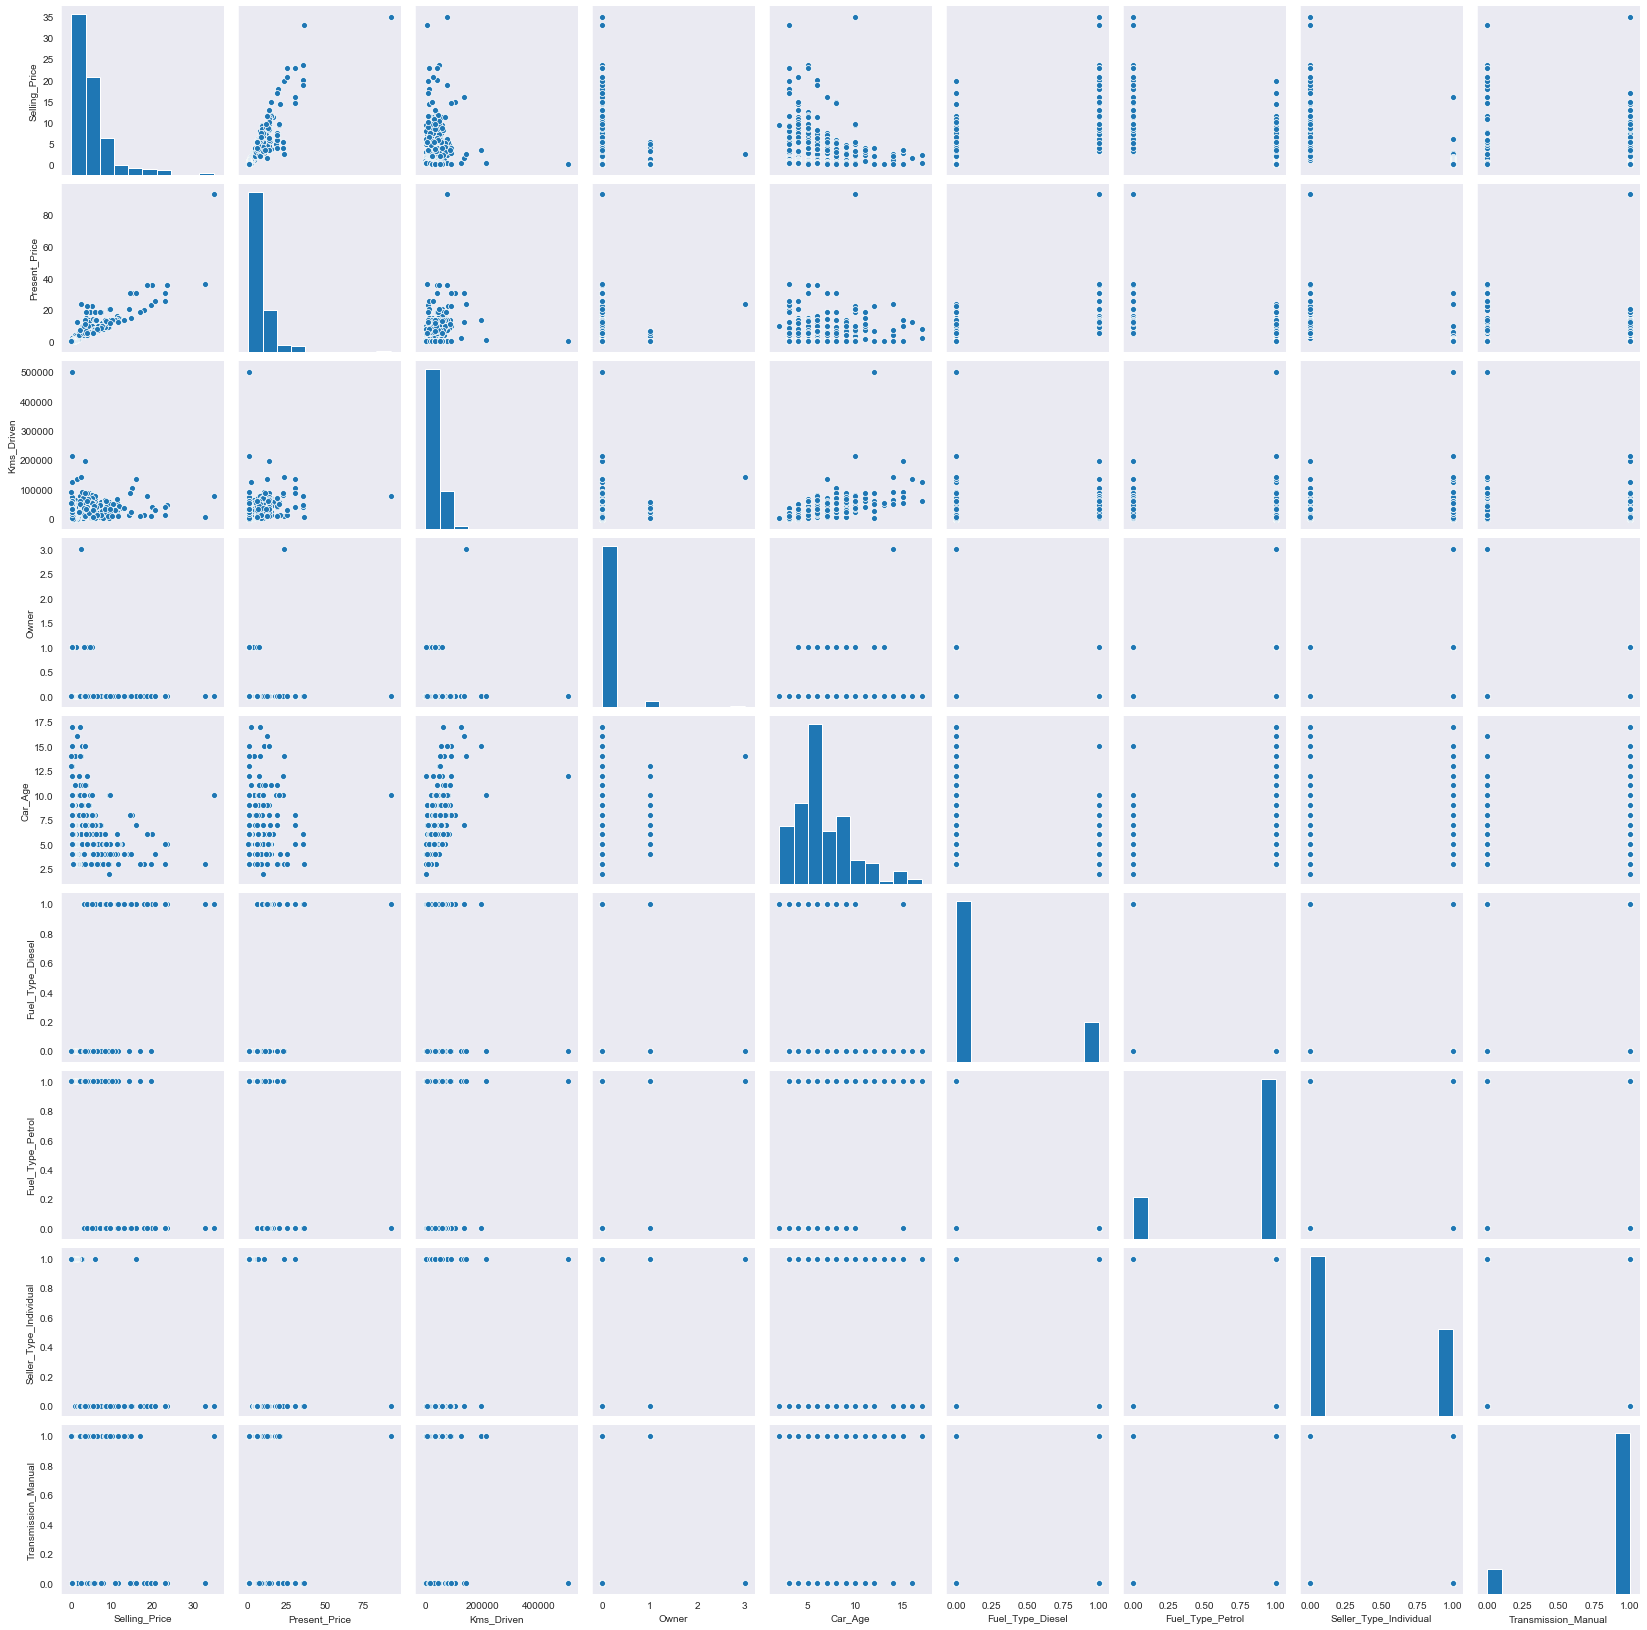

In [20]:
sns.pairplot(new)

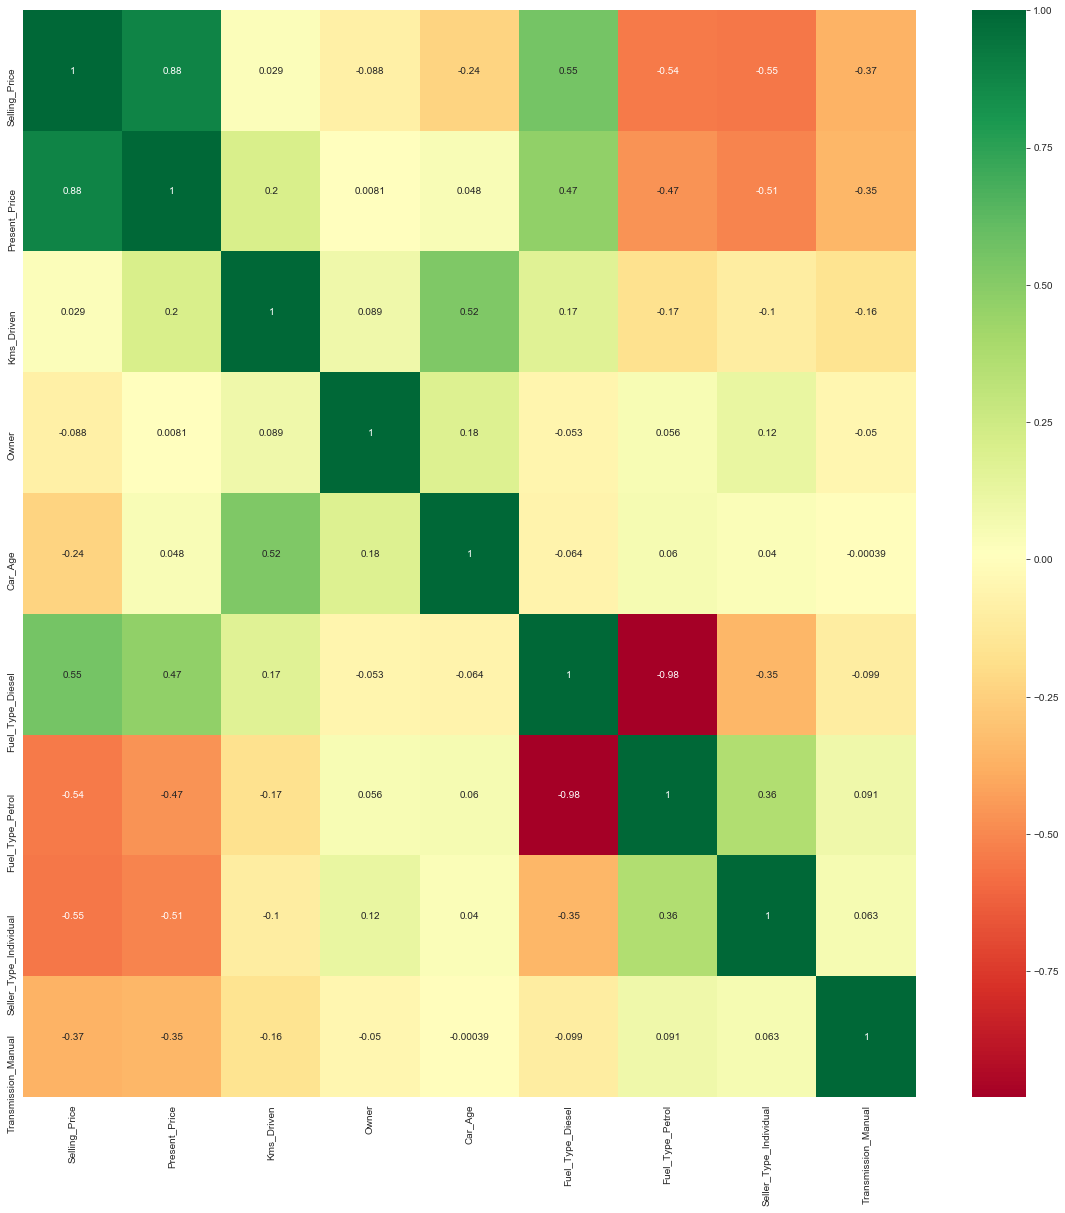

In [21]:
corrmat = new.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(new[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')

In [22]:
x = new.iloc[:,1:]
y = new.iloc[:,0]

In [23]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [25]:
print(model.feature_importances_)

[0.40353735 0.03951739 0.00042917 0.08021248 0.21124269 0.01661288
 0.11972322 0.12872483]


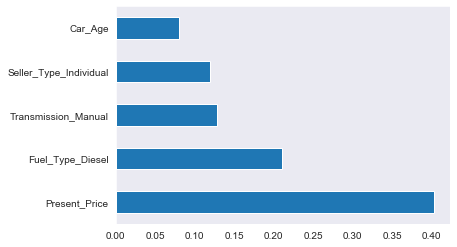

In [26]:
feature_import = pd.Series(model.feature_importances_, index= x.columns)
feature_import.nlargest(5).plot(kind = 'barh')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2 )

In [28]:
x_train.shape

(240, 8)

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [30]:
# to choose the best parameter for the decission tree
from sklearn.model_selection import RandomizedSearchCV


In [31]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto','sqrt']
max_depth = [2,4]
min_samples_split = [1,2]
bootstrap = [True, False]

In [32]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split':min_samples_split,
              'bootstrap':bootstrap}

In [33]:
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [1, 2], 'bootstrap': [True, False]}


In [34]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid,
                               scoring = 'neg_mean_squared_error', n_iter =10, cv = 5, verbose = 2,
                              random_state = 42)

In [35]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=48, min_samples_split=1, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=48, min_samples_split=1, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.0s
[CV] n_estimators=48, min_samples_split=1, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=48, min_samples_split=1, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.0s
[CV] n_estimators=48, min_samples_split=1, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=48, min_samples_split=1, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.0s
[CV] n_estimators=48, min_samples_split=1, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=48, min_samples_split=1, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.0s
[CV] n_estimators=48, min_samples_split=1, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=48, min_samples_split=1, max_fea

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\alqai\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\alqai\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\alqai\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWar

[CV]  n_estimators=72, min_samples_split=1, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.0s
[CV] n_estimators=17, min_samples_split=1, max_features=sqrt, max_depth=4, bootstrap=False 
[CV]  n_estimators=17, min_samples_split=1, max_features=sqrt, max_depth=4, bootstrap=False, total=   0.0s
[CV] n_estimators=17, min_samples_split=1, max_features=sqrt, max_depth=4, bootstrap=False 
[CV]  n_estimators=17, min_samples_split=1, max_features=sqrt, max_depth=4, bootstrap=False, total=   0.0s
[CV] n_estimators=17, min_samples_split=1, max_features=sqrt, max_depth=4, bootstrap=False 
[CV]  n_estimators=17, min_samples_split=1, max_features=sqrt, max_depth=4, bootstrap=False, total=   0.0s
[CV] n_estimators=17, min_samples_split=1, max_features=sqrt, max_depth=4, bootstrap=False 
[CV]  n_estimators=17, min_samples_split=1, max_features=sqrt, max_depth=4, bootstrap=False, total=   0.0s
[CV] n_estimators=17, min_samples_split=1, max_features=sqrt, max_depth=4, bootstrap=False 
[CV] 

C:\Users\alqai\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\alqai\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\alqai\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an in

[CV]  n_estimators=48, min_samples_split=2, max_features=auto, max_depth=4, bootstrap=True, total=   0.0s
[CV] n_estimators=48, min_samples_split=2, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=48, min_samples_split=2, max_features=auto, max_depth=4, bootstrap=True, total=   0.1s
[CV] n_estimators=48, min_samples_split=2, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=48, min_samples_split=2, max_features=auto, max_depth=4, bootstrap=True, total=   0.1s
[CV] n_estimators=41, min_samples_split=2, max_features=auto, max_depth=2, bootstrap=False 
[CV]  n_estimators=41, min_samples_split=2, max_features=auto, max_depth=2, bootstrap=False, total=   0.0s
[CV] n_estimators=41, min_samples_split=2, max_features=auto, max_depth=2, bootstrap=False 
[CV]  n_estimators=41, min_samples_split=2, max_features=auto, max_depth=2, bootstrap=False, total=   0.0s
[CV] n_estimators=41, min_samples_split=2, max_features=auto, max_depth=2, bootstrap=False 
[CV]  n_es

C:\Users\alqai\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\alqai\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\alqai\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an in

[CV]  n_estimators=17, min_samples_split=1, max_features=sqrt, max_depth=2, bootstrap=False, total=   0.0s
[CV] n_estimators=17, min_samples_split=2, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=17, min_samples_split=2, max_features=auto, max_depth=4, bootstrap=True, total=   0.0s
[CV] n_estimators=17, min_samples_split=2, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=17, min_samples_split=2, max_features=auto, max_depth=4, bootstrap=True, total=   0.0s
[CV] n_estimators=17, min_samples_split=2, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=17, min_samples_split=2, max_features=auto, max_depth=4, bootstrap=True, total=   0.0s
[CV] n_estimators=17, min_samples_split=2, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=17, min_samples_split=2, max_features=auto, max_depth=4, bootstrap=True, total=   0.0s
[CV] n_estimators=17, min_samples_split=2, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estima

C:\Users\alqai\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\alqai\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\alqai\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an in

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [37]:
predictions = rf_random.predict(x_test)

In [38]:
print(predictions)

[ 7.15713806  5.54145534  0.36892435  9.07692415  0.47989734  4.448652
  3.13327769  6.22364418  4.09350494  8.20330949  0.39147092 22.55471522
  1.13937775  6.22364418  0.75014656  0.45735077  6.94261992  5.12278849
  7.15713806  0.45735077  4.10885463  0.39147092  4.83765023  7.04833236
  0.36892435 10.02374075  2.70931565  0.45735077  1.09961996  1.17532546
  0.45735077 17.73529412  5.54145534 21.59011438  7.10912545  3.17164299
  1.17532546  5.14590866  0.36892435  0.45735077  5.81357094  0.36892435
  1.13937775 22.44156162  1.09961996  6.94261992  5.14590866  5.40532174
  5.14590866  1.09961996  1.87450364  0.41290038  0.45735077  5.96615822
  0.36892435  4.9976661  10.02374075  0.36892435  6.94261992  1.17532546
 10.02374075]


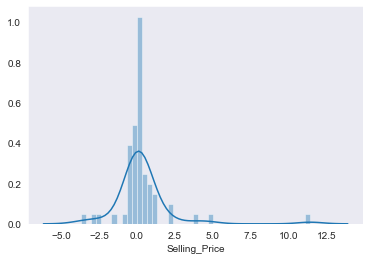

In [39]:
sns.distplot(y_test-predictions)

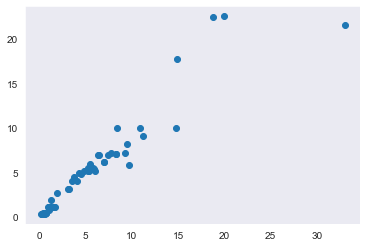

In [40]:
plt.scatter(y_test,predictions)

In [41]:
import pickle 

In [44]:
file =  open('car_predictions.pkl','wb')
pickle.dump(rf_random,file)

In [45]:
import dtale

In [46]:
dtale.show()

Exception: data loaded is None!